In [4]:
# 데이터 구성 패키지 DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 시각화, subpackage pyplot
import matplotlib
import matplotlib.pyplot as plt

# 통계적 시각화 추세 패키지
import seaborn as sns

# 통계 분석 패키지
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest # 비율 검정

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

#export_graphviz: 나무구조 생성및 저장
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

matplotlib.rc('font', family = 'NanumSquare')
plt.rc('font', family = 'NanumSquare')

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

In [5]:
df = pd.read_csv("data/MFG_TAT_결측치제거.csv", engine="python",encoding="cp949")
df.head()

,JUDGE,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,0,86,220.0,83.0,74,160.0,416.0,6900.0,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,0,86,210.0,84.0,71,150.0,372.0,6693.0,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,0,78,220.0,78.0,69,148.0,368.0,6747.0,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,0,86,210.0,84.0,69,178.0,416.0,7137.0,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,0,86,210.0,84.0,69,132.0,380.0,7527.0,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JUDGE                    3438 non-null   int64  
 1   TAT_1BLACK_1PRINT        3438 non-null   int64  
 2   TAT_1BLACK_2RTD          3438 non-null   float64
 3   TAT_2AG_1PRINT           3438 non-null   float64
 4   TAT_2AG_2RTD             3438 non-null   int64  
 5   TAT_2AG_3EXPOSURE        3438 non-null   float64
 6   TAT_3BUS_1DEVELOP        3438 non-null   float64
 7   TAT_3BUS_2FIRE           3438 non-null   float64
 8   TAT_4DIELEC_FIRE         3438 non-null   float64
 9   TAT_5MGO                 3438 non-null   float64
 10  TAT_6PHOS_1R_1DISPENSER  3438 non-null   float64
 11  TAT_6PHOS_1R_2DRY        3438 non-null   float64
 12  TAT_6PHOS_2G_1DISPENSER  3438 non-null   float64
 13  TAT_6PHOS_2G_2DRY        3438 non-null   float64
 14  TAT_6PHOS_3B_1DISPENSER 

설명변수 모두 숫자형 

In [7]:
df_TAT = df.iloc[:,:11]
df_TAT

,JUDGE,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER
0,0,86,220.0,83.0,74,160.0,416.0,6900.0,6447.0,530.0,76.0
1,0,86,210.0,84.0,71,150.0,372.0,6693.0,6600.0,530.0,80.0
2,0,78,220.0,78.0,69,148.0,368.0,6747.0,6597.0,530.0,80.0
3,0,86,210.0,84.0,69,178.0,416.0,7137.0,6420.0,530.0,78.0
4,0,86,210.0,84.0,69,132.0,380.0,7527.0,6453.0,540.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
3433,0,88,210.0,84.0,69,160.0,384.0,6867.0,6480.0,530.0,80.0
3434,0,86,220.0,87.0,69,142.0,356.0,6720.0,6540.0,530.0,78.0
3435,0,88,210.0,82.0,72,162.0,384.0,6900.0,6513.0,540.0,78.0
3436,1,86,220.0,86.0,69,202.0,328.0,7047.0,6447.0,530.0,78.0


In [8]:
df_TAT_y = df_TAT[["JUDGE"]]
df_TAT_y

,JUDGE
0,0
1,0
2,0
3,0
4,0
...,...
3433,0
3434,0
3435,0
3436,1


In [9]:
df_TAT_x = df_TAT.drop("JUDGE", axis=1, inplace=False)
df_TAT_x.head()

,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER
0,86,220.0,83.0,74,160.0,416.0,6900.0,6447.0,530.0,76.0
1,86,210.0,84.0,71,150.0,372.0,6693.0,6600.0,530.0,80.0
2,78,220.0,78.0,69,148.0,368.0,6747.0,6597.0,530.0,80.0
3,86,210.0,84.0,69,178.0,416.0,7137.0,6420.0,530.0,78.0
4,86,210.0,84.0,69,132.0,380.0,7527.0,6453.0,540.0,76.0


In [10]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeClassifier

In [11]:
#변수명 저장
v_feature_name = df_TAT_x.columns

In [12]:
#최종모델
tree_final = DTC(random_state = 1234, max_depth = 4, min_samples_leaf =10)
tree_final.fit(df_TAT_x,df_TAT_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1234)

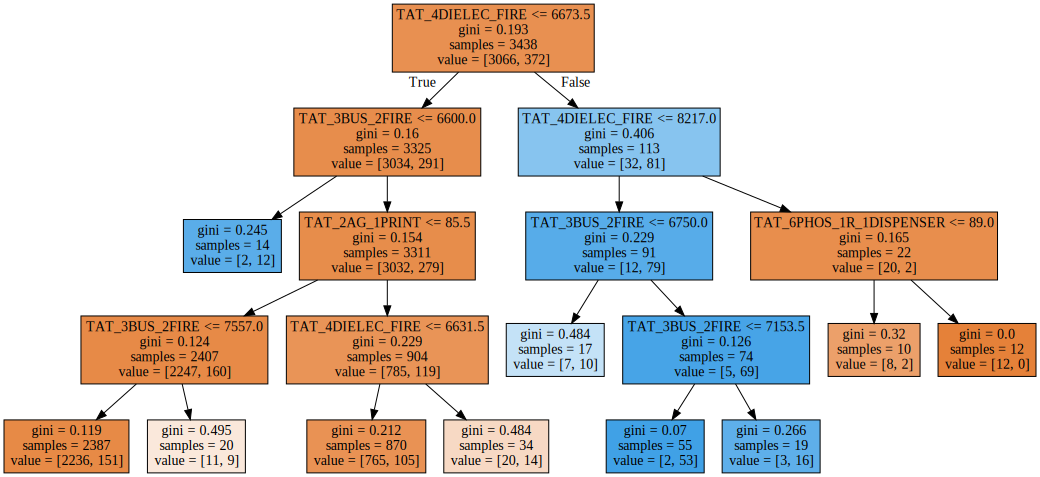

In [13]:
# 최종모델시각화 
export_graphviz(tree_final,out_file="tree_final.dot"\
                ,feature_names = v_feature_name,impurity = True,filled=True)

with open("tree_final.dot")as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [14]:
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:10]
df_importance7.round(4)

,Feature,Importance
7,TAT_4DIELEC_FIRE,0.7785
6,TAT_3BUS_2FIRE,0.1802
2,TAT_2AG_1PRINT,0.0383
9,TAT_6PHOS_1R_1DISPENSER,0.0030
0,TAT_1BLACK_1PRINT,0.0000
1,TAT_1BLACK_2RTD,0.0000
3,TAT_2AG_2RTD,0.0000
4,TAT_2AG_3EXPOSURE,0.0000
5,TAT_3BUS_1DEVELOP,0.0000
8,TAT_5MGO,0.0000


Text(0, 0.5, 'Variable')

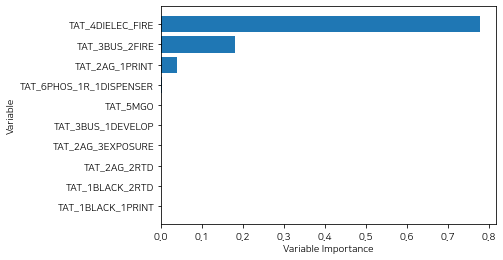

In [15]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance7.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance7))
plt.barh(y= coordinates, width =df_importance7["Importance"])
plt.yticks(coordinates, df_importance7["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

# 분산분석

In [16]:
df_TAT

,JUDGE,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER
0,0,86,220.0,83.0,74,160.0,416.0,6900.0,6447.0,530.0,76.0
1,0,86,210.0,84.0,71,150.0,372.0,6693.0,6600.0,530.0,80.0
2,0,78,220.0,78.0,69,148.0,368.0,6747.0,6597.0,530.0,80.0
3,0,86,210.0,84.0,69,178.0,416.0,7137.0,6420.0,530.0,78.0
4,0,86,210.0,84.0,69,132.0,380.0,7527.0,6453.0,540.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
3433,0,88,210.0,84.0,69,160.0,384.0,6867.0,6480.0,530.0,80.0
3434,0,86,220.0,87.0,69,142.0,356.0,6720.0,6540.0,530.0,78.0
3435,0,88,210.0,82.0,72,162.0,384.0,6900.0,6513.0,540.0,78.0
3436,1,86,220.0,86.0,69,202.0,328.0,7047.0,6447.0,530.0,78.0


In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


df_anova = ['TAT_2AG_1PRINT',
            'TAT_2AG_2RTD',
            'TAT_2AG_3EXPOSURE']

In [18]:
for i in df_anova :
    model = ols('JUDGE ~ C(%s)'%i, df_TAT).fit()
    print(anova_lm(model))
    print()

                       df      sum_sq   mean_sq         F        PR(>F)
C(TAT_2AG_1PRINT)    19.0   13.909095  0.732058  7.872439  9.229274e-22
Residual           3418.0  317.839596  0.092990       NaN           NaN

                     df      sum_sq   mean_sq         F    PR(>F)
C(TAT_2AG_2RTD)    11.0    3.526239  0.320567  3.346094  0.000131
Residual         3426.0  328.222452  0.095803       NaN       NaN

                          df      sum_sq   mean_sq         F        PR(>F)
C(TAT_2AG_3EXPOSURE)    76.0   29.542015  0.388711  4.323057  3.630833e-31
Residual              3361.0  302.206676  0.089916       NaN           NaN



AG_RTD관련 아노바 

TAT_2AG_3EXPOSURE  
TAT_2AG_1PRINT  
TAT_2AG_2RTD

# 랜덤포레스트 

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# 최종모델생성
rf_final = RandomForestClassifier(random_state=1234, n_estimators=100\
                                 ,min_samples_leaf=6\
                                 ,min_samples_split=13,max_depth=4)
rf_final.fit(df_TAT_x,df_TAT_y)

<ipython-input-20-2c9947bf7b2a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final.fit(df_TAT_x,df_TAT_y)


RandomForestClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=13,
                       random_state=1234)

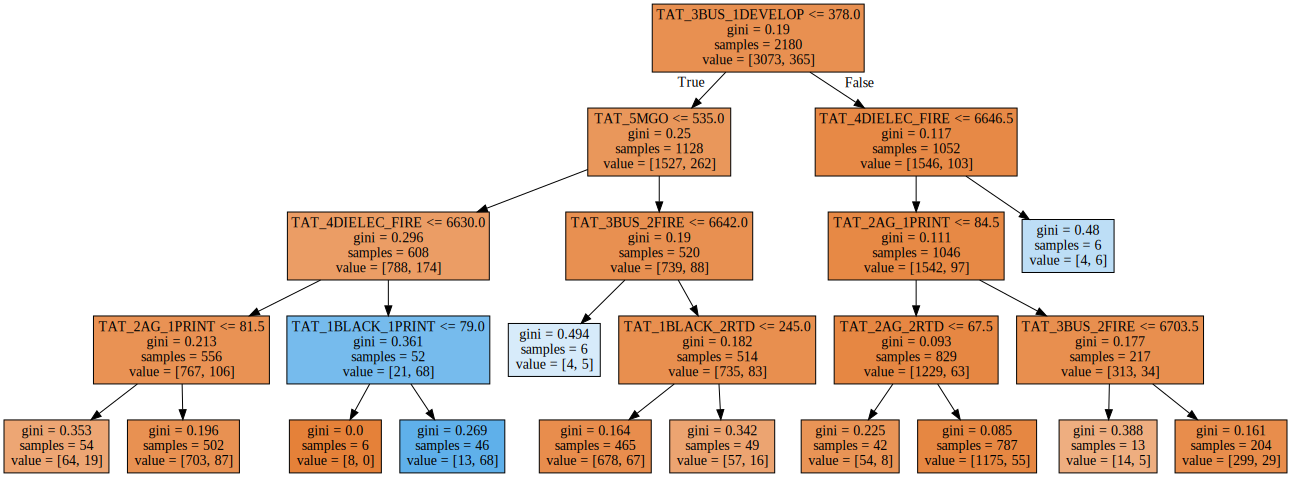

In [21]:
#변수명 저장
v_feature_name = df_TAT_x.columns
export_graphviz(rf_final.estimators_[0],out_file="rfr_final_0.dot"\
                ,feature_names =v_feature_name,\
                impurity=True,filled = True)

with open("rfr_final_0.dot")as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [23]:
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace =True)
df_importance.round(3)

,Feature,Importance
7,TAT_4DIELEC_FIRE,0.537
6,TAT_3BUS_2FIRE,0.171
5,TAT_3BUS_1DEVELOP,0.076
2,TAT_2AG_1PRINT,0.049
1,TAT_1BLACK_2RTD,0.043
0,TAT_1BLACK_1PRINT,0.039
4,TAT_2AG_3EXPOSURE,0.029
9,TAT_6PHOS_1R_1DISPENSER,0.024
3,TAT_2AG_2RTD,0.019
8,TAT_5MGO,0.013


랜덤포레스트

TAT_4DIELEC_FIRE  
TAT_3BUS_2FIRE  
TAT_3BUS_1DEVELOP  
TAT_2AG_1PRINT  

# 그래디언트부스팅

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
# 최종모델생성
gb_final = GradientBoostingClassifier(random_state=1234,n_estimators=30\
                                     ,min_samples_leaf=10,min_samples_split=32\
                                     ,max_depth=4,learning_rate=0.3)
gb_final.fit(df_TAT_x,df_TAT_y)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(learning_rate=0.3, max_depth=4, min_samples_leaf=10,
                           min_samples_split=32, n_estimators=30,
                           random_state=1234)

In [26]:
# 변수명 저장 
v_feature_name = df_TAT_x.columns

# 설명변수의 중요도 
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace =True)
df_importance.round(3)

,Feature,Importance
7,TAT_4DIELEC_FIRE,0.385
6,TAT_3BUS_2FIRE,0.237
5,TAT_3BUS_1DEVELOP,0.133
2,TAT_2AG_1PRINT,0.079
0,TAT_1BLACK_1PRINT,0.045
9,TAT_6PHOS_1R_1DISPENSER,0.037
4,TAT_2AG_3EXPOSURE,0.033
3,TAT_2AG_2RTD,0.023
1,TAT_1BLACK_2RTD,0.017
8,TAT_5MGO,0.011


그레디언트부스팅

TAT_4DIELEC_FIRE 0.385
TAT_3BUS_2FIRE 0.237
TAT_3BUS_1DEVELOP 0.133
TAT_2AG_1PRINT 0.079
TAT_1BLACK_1PRINT 0.045